# Step1: Import necessary libraries
# Data Cleaning
# Step2: Exploratory Data Analysis
# Step3: Data Preprocess(Scaling/Normalization and splitting the dataset)
# Step4: Model
# Step5: Training the model
# Step6: Testing the model
# Step7: Prediction

In [34]:
# Step 1


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow.estimator as tfe
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [35]:
# The dataset is very huge for my processor to run quickly so I reduced it. 
# Although it may affect the accuracy , it wont affect it that much

In [37]:
df1 = pd.read_csv('downloads/1_label.csv',nrows=50)
df2 = pd.read_csv('downloads/2_label.csv',nrows=50)
df3 = pd.read_csv('downloads/3_label.csv',nrows=50)
df4 = pd.read_csv('downloads/4_label.csv',nrows=50)
df5 = pd.read_csv('downloads/5_label.csv',nrows=50)
df6 = pd.read_csv('downloads/6_label.csv',nrows=50)
df7 = pd.read_csv('downloads/7_label.csv',nrows=50)
df8 = pd.read_csv('downloads/8_label.csv',nrows=50)
df9 = pd.read_csv('downloads/9_label.csv',nrows=50)


In [38]:
#added all the 10 different set of data
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
df.shape


(449, 11)

In [39]:
df.tail()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
45,1628413520,-0.385254,-0.940430,-0.077148,1.098633,-2.197266,-0.549316,-19.5,126.0,-411.0,9
46,1628413521,-0.390137,-0.935547,-0.069824,2.807617,-2.685547,-0.732422,1.5,139.5,-421.5,9
47,1628413521,-0.392578,-0.937500,-0.073731,1.464844,-2.685547,-1.098633,-27.0,139.5,-420.0,9
48,1628413521,-0.393555,-0.946777,-0.075684,1.953125,-2.868652,-0.854492,6.0,144.0,-420.0,9
49,1628413521,-0.384277,-0.941895,-0.076172,2.929688,-3.112793,-1.464844,-13.5,126.0,-424.5,9


In [38]:
df.columns

Index(['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z', 'label'],
      dtype='object')

In [23]:
df.isna().any()

time     False
acc_x    False
acc_y    False
acc_z    False
gyr_x    False
gyr_y    False
gyr_z    False
mag_x    False
mag_y    False
mag_z    False
label    False
dtype: bool

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12016959 entries, 0 to 98
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


In [24]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07,1.201696e+07
mean,1.628367e+09,-4.978357e-02,5.371257e-01,1.259089e-01,8.482040e-01,-1.868656e+00,-7.063460e-01,-2.762965e+02,4.135529e+02,2.042601e+02,4.029850e+00
std,4.305616e+04,2.448001e-01,7.862093e-01,1.659268e-01,1.382804e+01,2.221574e+01,1.113654e+01,2.482428e+02,6.006242e+02,4.370130e+02,2.263876e+00
min,1.628251e+09,-1.599756e+01,-1.599805e+01,-1.599756e+01,-1.999756e+03,-1.986816e+03,-1.969482e+03,-1.183500e+03,-7.665000e+02,-1.152000e+03,1.000000e+00
25%,1.628328e+09,-2.216797e-01,7.900391e-01,4.541020e-02,-2.441406e+00,-6.713867e+00,-3.112793e+00,-4.140000e+02,-6.450000e+01,1.395000e+02,1.000000e+00
50%,1.628344e+09,-5.517580e-02,9.404297e-01,1.318359e-01,7.934571e-01,-1.953125e+00,-6.713868e-01,-2.310000e+02,1.095000e+02,3.240000e+02,4.000000e+00
75%,1.628406e+09,1.103516e-01,9.770508e-01,2.104492e-01,4.028320e+00,2.685547e+00,1.770020e+00,-1.230000e+02,1.006500e+03,5.325000e+02,6.000000e+00
max,1.628426e+09,1.171582e+01,1.599170e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.888306e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


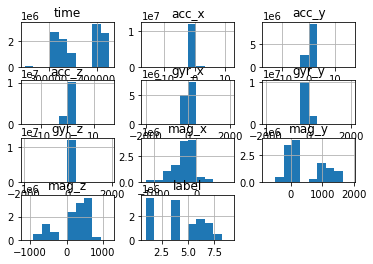

In [28]:
#some graph to show relationship ammong variables
df.hist()
plt.show()

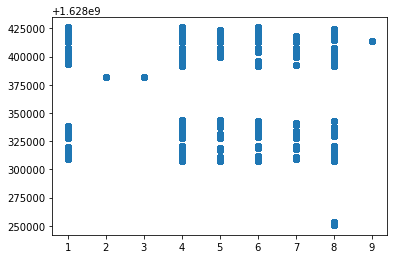

In [31]:
plt.scatter(df['label'],df['time'])


In [42]:
#data preprocessing

scaler = StandardScaler()
scaler.fit(df.drop("label",axis=1))
scaler = scaler.fit_transform(df.drop("label",axis=1))
scaler = pd.DataFrame(scaler,columns=['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z'])


X = scaler.loc[:,:]
y = df.loc[:,'label']


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [43]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# tensorflow requires feature column so it will know wether is is dealing with numbers or categorical values
def feature_columns():
    
    feat_time = tf.feature_column.numeric_column('time')
    feat_acc_x = tf.feature_column.numeric_column('acc_x')
    feat_acc_y = tf.feature_column.numeric_column('acc_y')
    feat_acc_z = tf.feature_column.numeric_column('acc_z')
    feat_gyr_x = tf.feature_column.numeric_column('gyr_x')
    feat_gyr_y = tf.feature_column.numeric_column('gyr_y')
    feat_gyr_z  = tf.feature_column.numeric_column('gyr_z')
    feat_mag_x  = tf.feature_column.numeric_column('mag_x')
    feat_mag_y  = tf.feature_column.numeric_column('mag_y')
    feat_mag_z  = tf.feature_column.numeric_column('mag_z')
    
    
    
    
    feature_column = ['feat_time', 'feat_acc_x', 'feat_acc_y', 'feat_acc_z', 'feat_gyr_x', 'feat_gyr_y',
                      'feat_gyr_z', 'feat_mag_x','feat_mag_y', 'feat_mag_z']
    return feature_column


In [12]:


input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train, 
                                                 y_train,
                                                 batch_size=100,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_test,
                                               y_test,
                                               batch_size=100,
                                               num_epochs=1,
                                               shuffle=False)
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      num_epochs=1,
      shuffle=False)


In [17]:
feature_column = feature_columns()
classifier = tfe.DNNClassifier(
    feature_columns=feature_column,
    hidden_units=[1024, 512, 256],
    n_classes=10,
    optimizer = tf.optimizers.Adam(learning_rate=0.3))
    
  

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/w6/sqx_mjh176x08sjppl82f1l80000gn/T/tmpd7azes74', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
train = classifier.train(input_fn=input_fn, 
               steps=500)
train


#I keep on getting this error because I am not that familiar with tensorflow
# and Ive done a lot of research but none helped me
#so I tried a different model(Sequential) instead of DNNClassifier

INFO:tensorflow:Calling model_fn.


ValueError: Received a feature column from TensorFlow v1, but this is a TensorFlow v2 Estimator. Please either use v2 feature columns (accessible via tf.feature_column.* in TF 2.x) with this Estimator, or switch to a v1 Estimator for use with v1 feature columns (accessible via tf.compat.v1.estimator.* and tf.compat.v1.feature_column.*, respectively.

In [46]:
#using Sequential Model on the dataset
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=10))
model.add(Dense(32,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=400)


Epoch 1/400
12/12 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0787
Epoch 2/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1004
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1019
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1065
Epoch 5/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1034
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0997
Epoch 7/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1015
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1137
Epoch 9/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0961
Epoch 10/400
12/12 [==============================] - 0s 2ms/step - loss:

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1100
Epoch 80/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1163
Epoch 81/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1037
Epoch 82/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0912
Epoch 83/400
12/12 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0929
Epoch 84/400
12/12 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0951
Epoch 85/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1088
Epoch 86/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1121
Epoch 87/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1110
Epoch 88/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1002
Epoch 157/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1170
Epoch 158/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1136
Epoch 159/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1110
Epoch 160/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0777
Epoch 161/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0841
Epoch 162/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1148
Epoch 163/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0810
Epoch 164/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1064
Epoch 165/400
12/12 [==============================] - 0s 2ms/step - 

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0817
Epoch 235/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0966
Epoch 236/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0914
Epoch 237/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1005
Epoch 238/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0896
Epoch 239/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0932
Epoch 240/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0967
Epoch 241/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1074
Epoch 242/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1086
Epoch 243/400
12/12 [==============================] - 0s 2ms/step - 

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0938
Epoch 313/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1107
Epoch 314/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1304
Epoch 315/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1007
Epoch 316/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1156
Epoch 317/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0987
Epoch 318/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1204
Epoch 319/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1006
Epoch 320/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0962
Epoch 321/400
12/12 [==============================] - 0s 2ms/step - 

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1126
Epoch 391/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1083
Epoch 392/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1063
Epoch 393/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1083
Epoch 394/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1098
Epoch 395/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1040
Epoch 396/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1111
Epoch 397/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1019
Epoch 398/400
12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0938
Epoch 399/400
12/12 [==============================] - 0s 2ms/step - 

In [ ]:
## I will work on this data again
## I am still learning 🙏🏻